#Reading and cleaning energy data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

Edata = pd.read_csv('Plant_1_Generation_Data.csv', date_parser = True) #Energy Data
print(Edata.head())
Edata.info()

Edata=Edata.drop(['PLANT_ID', 'AC_POWER', 'SOURCE_KEY',
                  'DAILY_YIELD', 'TOTAL_YIELD'], axis=1)


Edata = Edata.drop_duplicates(subset='DATE_TIME', keep='first')
Edata = Edata.reset_index(drop=True)
print(Edata)


          DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float

#Reading and cleaning weather data

In [ ]:
Wdata = pd.read_csv('Plant_1_Weather_Sensor_Data.csv', date_parser = True) #Weather Data
print(Wdata.head())
Wdata.info()

Wdata=Wdata.drop(['PLANT_ID', 'SOURCE_KEY', 'DATE_TIME'], axis=1)

print(Wdata)


             DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1  2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2  2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3  2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4  2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   

   MODULE_TEMPERATURE  IRRADIATION  
0           22.857507          0.0  
1           22.761668          0.0  
2           22.592306          0.0  
3           22.360852          0.0  
4           22.165423          0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3

#Merging the two dataframes and final data cleaning

In [ ]:
#Combining the energy and weather data into a single dataframe
data = pd.concat([Edata, Wdata], axis=1)
#Dropping all rows containing NaN-values
data = data.dropna()

data.info()
data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3158 entries, 0 to 3157
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3158 non-null   object 
 1   DC_POWER             3158 non-null   float64
 2   AMBIENT_TEMPERATURE  3158 non-null   float64
 3   MODULE_TEMPERATURE   3158 non-null   float64
 4   IRRADIATION          3158 non-null   float64
dtypes: float64(4), object(1)
memory usage: 148.0+ KB


,DATE_TIME,DC_POWER,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,15-05-2020 00:00,0.0,25.184316,22.857507,0.000000
1,15-05-2020 00:15,0.0,25.084589,22.761668,0.000000
2,15-05-2020 00:30,0.0,24.935753,22.592306,0.000000
3,15-05-2020 00:45,0.0,24.846130,22.360852,0.000000
4,15-05-2020 01:00,0.0,24.621525,22.165423,0.000000
...,...,...,...,...,...
3153,17-06-2020 22:45,0.0,24.291896,26.972266,0.071616
3154,17-06-2020 23:00,0.0,24.191860,25.512402,0.086473
3155,17-06-2020 23:15,0.0,24.196167,26.664971,0.104762
3156,17-06-2020 23:30,0.0,24.278404,26.862443,0.090132


#Data analysis and preprocessing

In [ ]:
#Splitting the data into train_set, which contains 80% of the data and test_set
#which contains 20% of the data
train_set, test_set= np.split(data, [int(.8 *len(data))]).copy() 
print(train_set)
print(test_set)


             DATE_TIME     DC_POWER  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0     15-05-2020 00:00     0.000000            25.184316           22.857507   
1     15-05-2020 00:15     0.000000            25.084589           22.761668   
2     15-05-2020 00:30     0.000000            24.935753           22.592306   
3     15-05-2020 00:45     0.000000            24.846130           22.360852   
4     15-05-2020 01:00     0.000000            24.621525           22.165423   
...                ...          ...                  ...                 ...   
2521  11-06-2020 08:15  2702.714286            21.722754           20.269165   
2522  11-06-2020 08:30  2826.875000            21.639461           20.067592   
2523  11-06-2020 08:45  3176.714286            21.511770           19.800008   
2524  11-06-2020 09:00  3524.625000            21.408012           19.598836   
2525  11-06-2020 09:15  3906.428571            21.252618           19.653347   

      IRRADIATION  
0             0.0  

In [ ]:
#Dropping 'DATE_TIME' column as it is no longer needed
training_data = train_set.drop(['DATE_TIME'], axis=1)
training_data.head()

,DC_POWER,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,0.0,25.184316,22.857507,0.0
1,0.0,25.084589,22.761668,0.0
2,0.0,24.935753,22.592306,0.0
3,0.0,24.846130,22.360852,0.0
4,0.0,24.621525,22.165423,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data


array([[0.        , 0.32219047, 0.09950559, 0.        ],
       [0.        , 0.31547662, 0.09748388, 0.        ],
       [0.        , 0.30545668, 0.09391123, 0.        ],
       ...,
       [0.23822124, 0.07494724, 0.03500859, 0.        ],
       [0.264311  , 0.06796205, 0.03076493, 0.        ],
       [0.29294239, 0.05750065, 0.03191481, 0.        ]])

In [ ]:
X_train = []
y_train = []

In [ ]:
for i in range(96, training_data.shape[0]):
    X_train.append(training_data[i-96:i])
    y_train.append(training_data[i, 0])

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape, y_train.shape

((2430, 96, 4), (2430,))

#Creating the RNN-LSTM model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import sequence 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, LSTM

model = Sequential()
model.add(LSTM(units=50, activation = 'relu', return_sequences = True, input_shape=(X_train.shape[1], 4)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, activation = 'relu', return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(loss='MAE', optimizer='adam')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 96, 50)            11000     
                                                                 
 dropout (Dropout)           (None, 96, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 31,251
Trainable params: 31,251
Non-trainable params: 0
_________________________________________________________________


#Training the model

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=20, validation_split=0.2, shuffle=False )

Epoch 1/20
98/98 [==============================] - 20s 159ms/step - loss: 0.1513 - val_loss: 0.0918
Epoch 2/20
98/98 [==============================] - 10s 106ms/step - loss: 0.0974 - val_loss: 0.0737
Epoch 3/20
98/98 [==============================] - 8s 77ms/step - loss: 0.0763 - val_loss: 0.0683
Epoch 4/20
98/98 [==============================] - 8s 77ms/step - loss: 0.0759 - val_loss: 0.0630
Epoch 5/20
98/98 [==============================] - 8s 77ms/step - loss: 0.0741 - val_loss: 0.0619
Epoch 6/20
98/98 [==============================] - 8s 77ms/step - loss: 0.0705 - val_loss: 0.0615
Epoch 7/20
98/98 [==============================] - 7s 77ms/step - loss: 0.0675 - val_loss: 0.0588
Epoch 8/20
98/98 [==============================] - 8s 77ms/step - loss: 0.0658 - val_loss: 0.0590
Epoch 9/20
98/98 [==============================] - 8s 77ms/step - loss: 0.0660 - val_loss: 0.0562
Epoch 10/20
98/98 [==============================] - 8s 77ms/step - loss: 0.0632 - val_loss: 0.0562
Epoch

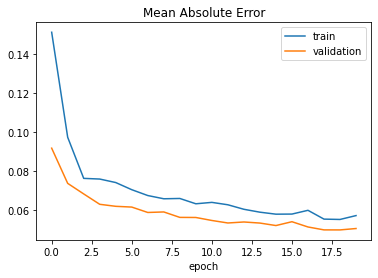

In [ ]:
#Plotting the Mean Absolute Error of the training and validation phase
plt.title('Mean Absolute Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
test_set.head()

,DATE_TIME,DC_POWER,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
2526,11-06-2020 09:30,4156.250000,21.170427,19.669116,0.0
2527,11-06-2020 09:45,4452.285714,21.137506,19.666156,0.0
2528,11-06-2020 10:00,4785.000000,21.111489,19.494969,0.0
2529,11-06-2020 10:15,5215.571429,21.151516,19.529553,0.0
2530,11-06-2020 10:30,5336.142857,21.679722,19.959000,0.0


In [ ]:
past_day = train_set.tail(96)

In [ ]:
df = past_day.append(test_set, ignore_index = True)
df = df.drop(['DATE_TIME'], axis=1)
df.head()

,DC_POWER,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,8517.375000,21.942822,19.850952,0.0
1,5274.000000,21.844206,19.808901,0.0
2,4711.000000,21.888639,19.825120,0.0
3,6561.714286,21.924648,19.850222,0.0
4,5911.375000,21.943217,19.759975,0.0


In [ ]:
inputs = scaler.transform(df)
inputs

array([[0.63871644, 0.10396657, 0.03608324, 0.        ],
       [0.39549633, 0.0973275 , 0.03519618, 0.        ],
       [0.35327706, 0.10031886, 0.03553832, 0.        ],
       ...,
       [0.        , 0.25566627, 0.17982285, 0.09101054],
       [0.        , 0.26120261, 0.18398846, 0.0783004 ],
       [0.        , 0.25418541, 0.16474648, 0.05669224]])

In [ ]:
X_test = []
y_test = []

for i in range(96, inputs.shape[0]):
    X_test.append(inputs[i-96:i])
    y_test.append(inputs[i, 0])

In [ ]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((632, 96, 4), (632,))

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#Prediction accuracy score on a scale of 0 to 1, 1 = 100% accuracy
from sklearn.metrics import r2_score
pred_score = r2_score(y_test, y_pred)
print("The prediction accuracy is :",pred_score)

The prediction accuracy is : 0.8705867146301303


In [ ]:
scaler.scale_

array([7.49898228e-05, 6.73220184e-02, 2.10946885e-02, 8.68732538e-01])

In [ ]:
scale = 1/7.49898228e-05
scale

13335.142858878711

In [ ]:
y_pred = y_pred*scale
y_test = y_test*scale

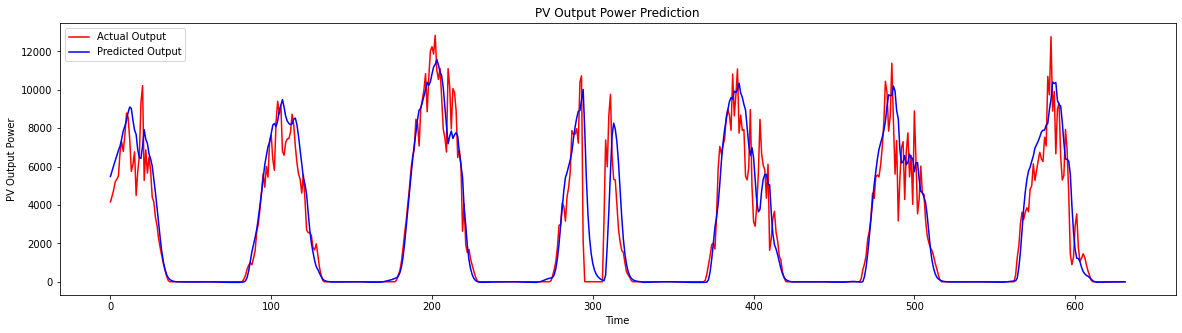

In [ ]:
#Visualizing the results
plt.figure(figsize=(20,5))
plt.plot(y_test, color = 'red', label = 'Actual Output')
plt.plot(y_pred, color = 'blue', label = 'Predicted Output')
plt.title('PV Output Power Prediction')
plt.xlabel('Time')
plt.ylabel('PV Output Power')
plt.legend()
plt.show()